# Daily Report

We replicate the numbers of cases published in the daily meeting

In [22]:
import glob
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
import json
from tools import to_datetime_df, summary, apply_to_report, get_deltas_proportion
from constants import COLUMNS_REPORT
from IPython.display import Markdown as md


%matplotlib 

Using matplotlib backend: MacOSX


In [2]:

strpath = '../src/'
m = []
tlalpan = []
gam = []
leon = []
qro = []
huix = []
if not os.path.isfile('report_data1.csv'):
    for filename in glob.glob(strpath+"*"):
        if filename.find('.csv')>0:
            date = filename[7:9] +'-' + filename[11:13] +'-' +filename[13:15]
            df = pd.read_csv(filename, encoding = "ISO-8859-1", dtype = str)
            # convert to datetime 
            to_datetime_df(df)
            apply_to_report(df)
            df['FECHA_ACTUALIZACION1'] = pd.to_datetime(df['FECHA_ACTUALIZACION'],)
            df['deltaSintomas'] = df.FECHA_ACTUALIZACION1 - df.FECHA_SINTOMAS 
            df['deltaSintomas'] = df.deltaSintomas.dt.days

            m.append(
                summary(df)
            )
            tlalpan.append(
                summary(df[(df.MUNICIPIO_RES == 'TLALPAN') & (df.ENTIDAD_RES == 'CIUDAD DE MÉXICO')])
            )
            gam.append(
                summary(df[(df.MUNICIPIO_RES == 'GUSTAVO A. MADERO') & (df.ENTIDAD_RES == 'CIUDAD DE MÉXICO')])
            )
            leon.append(
                summary(df[(df.MUNICIPIO_RES=='LEON') & (df.ENTIDAD_RES=='GUANAJUATO')])
            )
            qro.append(
                summary(df[(df.MUNICIPIO_RES=='QUERETARO') & (df.ENTIDAD_RES=='QUERÉTARO') ])
            )
            huix.append(
                summary(df[(df.MUNICIPIO_RES=='HUIXQUILUCAN') & (df.ENTIDAD_RES=='MÉXICO') ])
            )
            
    df = pd.DataFrame(m)
    dftlalpan = pd.DataFrame(tlalpan)
    dfgam = pd.DataFrame(gam)
    dfleon = pd.DataFrame(leon)
    dfqro = pd.DataFrame(qro)
    dfhuix = pd.DataFrame(huix)
    
    dftlalpan.columns = COLUMNS_REPORT
    dfgam.columns = COLUMNS_REPORT
    dfleon.columns = COLUMNS_REPORT
    dfqro.columns = COLUMNS_REPORT
    dfhuix.columns = COLUMNS_REPORT
    df.columns = COLUMNS_REPORT
    
    dftlalpan = dftlalpan.sort_values(by='date', ascending=False)
    dfgam  = dfgam.sort_values(by='date', ascending=False)
    dfleon = dfleon.sort_values(by='date', ascending=False)
    dfqro  = dfqro.sort_values(by='date', ascending=False)
    dfhuix = dfhuix.sort_values(by='date', ascending=False)
    df     = df.sort_values(by='date', ascending=False)
    # df.to_csv('report_data.csv', index=False)
    
    dftlalpan = dftlalpan.reset_index(drop=True)
    dfgam = dfgam.reset_index(drop=True)
    dfleon = dfleon.reset_index(drop=True)
    dfqro = dfqro.reset_index(drop=True)
    dfhuix = dfhuix.reset_index(drop=True)
    df = df.reset_index(drop=True)
else:
    df0 = pd.read_csv('report_data.csv')
    df0.date = pd.to_datetime(df0['date'], format='%Y-%m-%d')
    lastdateRecord = df0.date.max()
    deltaT = datetime.datetime.now() - lastdateRecord
    for i in range(1,deltaT.days+1) :
        filename = (lastdateRecord + datetime.timedelta(days=1)).strftime("%Y%m%d")+'.csv'
        df = pd.read_csv(strpath+filename, encoding = "ISO-8859-1",dtype =str)
        df['FECHA_ACTUALIZACION1'] = pd.to_datetime(df['FECHA_ACTUALIZACION'],)
        df.FECHA_INGRESO = pd.to_datetime(df['FECHA_INGRESO'],)
        df.FECHA_SINTOMAS = pd.to_datetime(df['FECHA_SINTOMAS'],)
        df['deltaSintomas']=df.FECHA_ACTUALIZACION1-df.FECHA_SINTOMAS 
        df['deltaSintomas'] = df.deltaSintomas.dt.days
        df.loc[df.FECHA_DEF=='9999-99-99', 'FECHA_DEF'] = '2050-12-31'
        df.FECHA_DEF = pd.to_datetime(df['FECHA_DEF'],)
        m.append([df.FECHA_ACTUALIZACION.unique()[0]
                  ,df[(df.deltaSintomas<14)& (df.RESULTADO=='1')]['ID_REGISTRO'].count()
              ,df[df.RESULTADO=='1']['ID_REGISTRO'].count()
              ,df[(df.FECHA_DEF!='2050-12-31')&(df.RESULTADO=='1')]['ID_REGISTRO'].count()
              ,df[df.RESULTADO=='3']['ID_REGISTRO'].count()
              ,df.ID_REGISTRO.nunique()
              ,len(df[(df.deltaSintomas<14)& (df.RESULTADO=='3')])
              ,len(df[(df.FECHA_DEF<'2020-12-31')&(df.RESULTADO=='3')])
              ,len(df[(df.FECHA_DEF<'2020-12-31')&(df.RESULTADO=='2')])
                 ]
        )##
        
        
        
    ##   
    df1 = pd.DataFrame(m)
    df1.columns = ['date', 'activos', 'positivos', 'muertes', 'sospechosos', 'muestra', 'activos sospechosos', 'defunciones sospechosos', 'muertos negativos']
    df1 = df1.sort_values(by='date', ascending=False)
    frames = [df1,df0]
    df = pd.concat(frames)
    df = df.reset_index(drop=True)
    df.to_csv('report_data.csv', index=False)

In [6]:
get_deltas_proportion(df)
get_deltas_proportion(dftlalpan)
get_deltas_proportion(dfgam)
get_deltas_proportion(dfleon)
get_deltas_proportion(dfqro)
get_deltas_proportion(dfhuix)

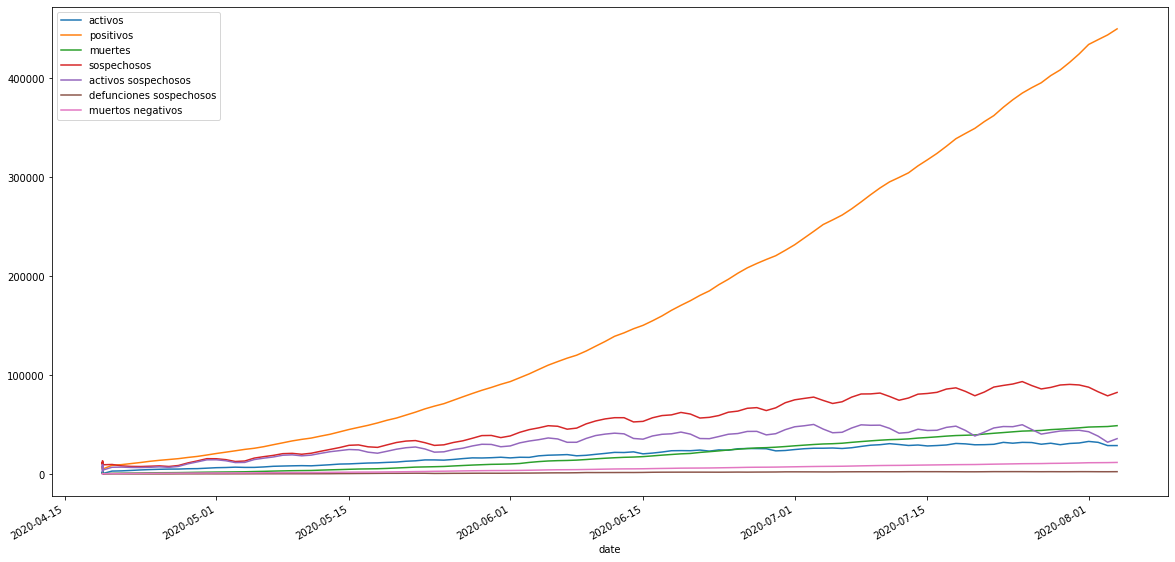

In [7]:
df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')
df[['date', 'activos', 'positivos', 'muertes', 'sospechosos',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].set_index('date').plot(figsize=(20,10))

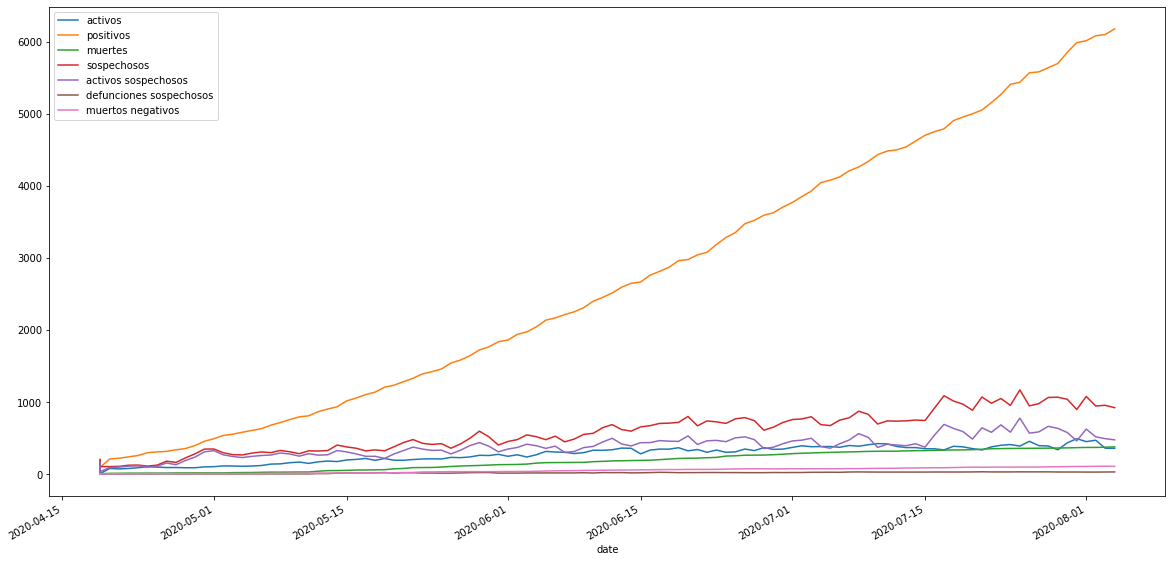

In [8]:
dftlalpan.date = pd.to_datetime(dftlalpan['date'], format='%Y-%m-%d')
dftlalpan[['date', 'activos', 'positivos', 'muertes', 'sospechosos',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].set_index('date').plot(figsize=(20,10))

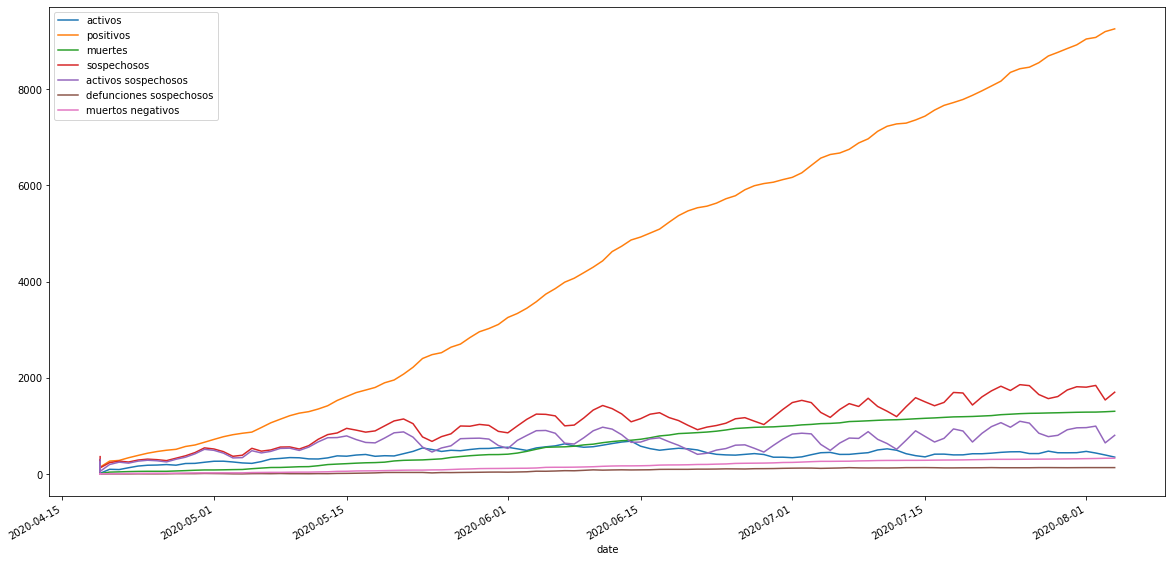

In [9]:
dfgam.date = pd.to_datetime(dfgam['date'], format='%Y-%m-%d')
dfgam[['date', 'activos', 'positivos', 'muertes', 'sospechosos',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].set_index('date').plot(figsize=(20,10))

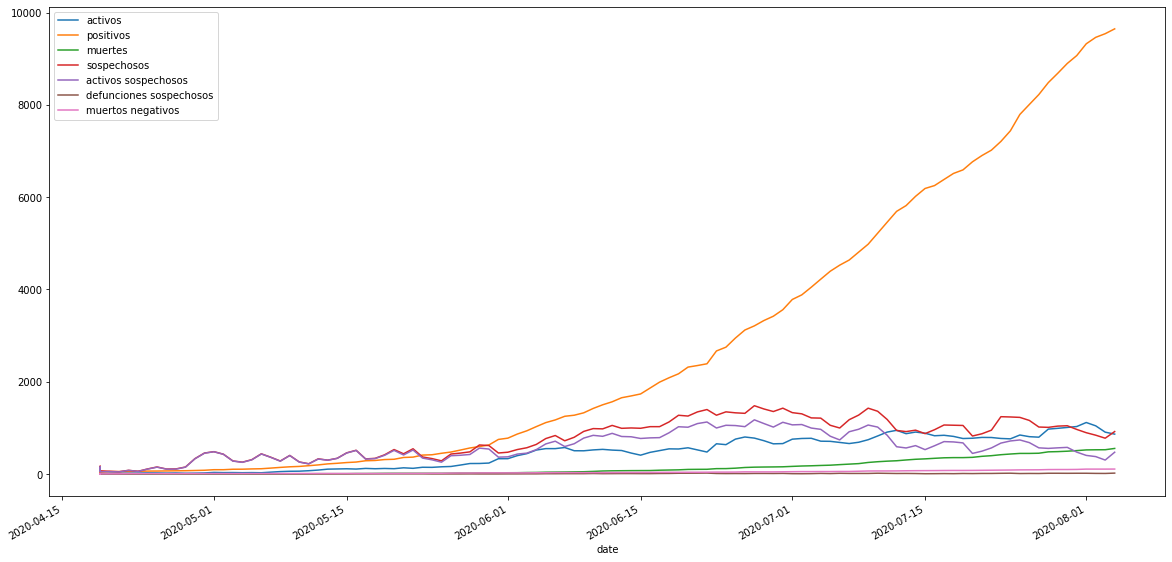

In [10]:
dfleon.date = pd.to_datetime(dfleon['date'], format='%Y-%m-%d')
dfleon[['date', 'activos', 'positivos', 'muertes', 'sospechosos',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].set_index('date').plot(figsize=(20,10))

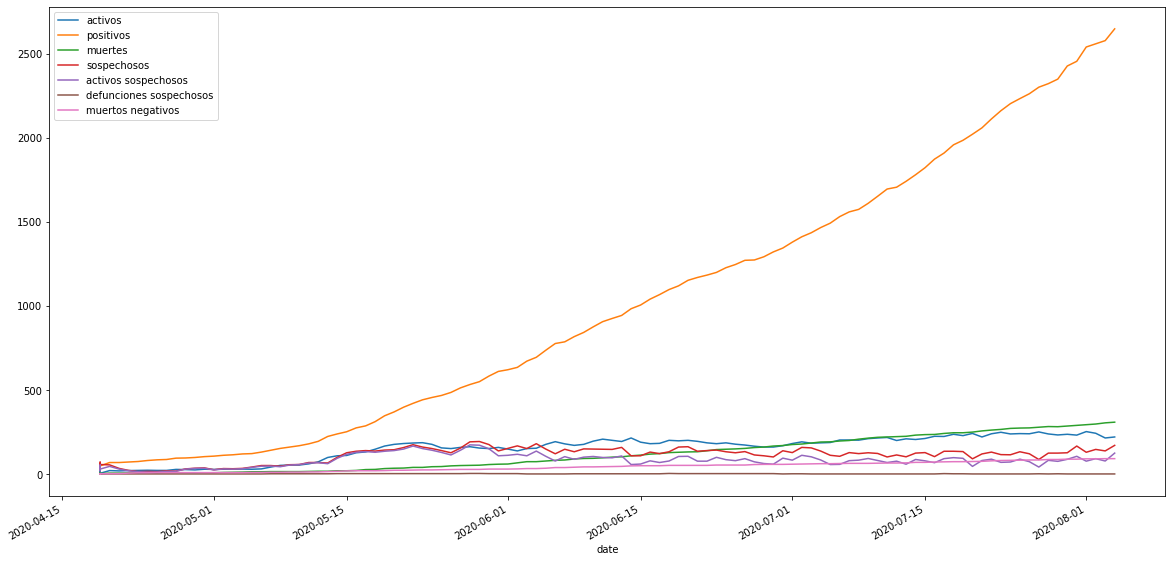

In [11]:
dfqro.date = pd.to_datetime(dfqro['date'], format='%Y-%m-%d')
dfqro[['date', 'activos', 'positivos', 'muertes', 'sospechosos',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].set_index('date').plot(figsize=(20,10))

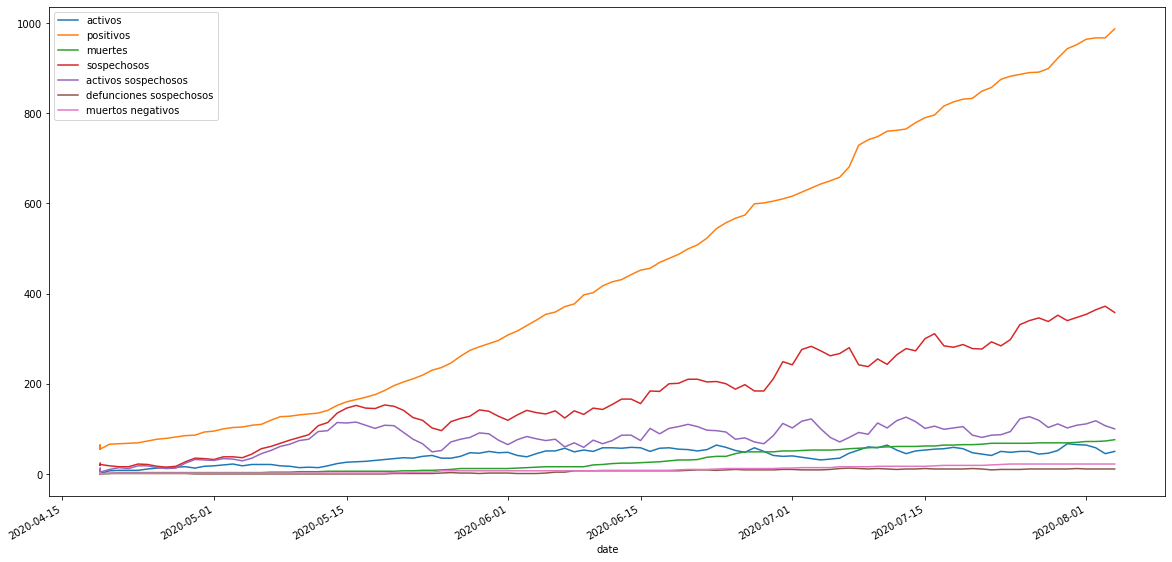

In [12]:
dfhuix.date = pd.to_datetime(dfhuix['date'], format='%Y-%m-%d')
dfhuix[['date', 'activos', 'positivos', 'muertes', 'sospechosos',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].set_index('date').plot(figsize=(20,10))

In [25]:
print("Querétaro,Querétaro")
dfqro[['date', 'activos', 'positivos', 'muertes', 'sospechosos', 'muestra',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].head(7)


Querétaro,Querétaro


,date,activos,positivos,muertes,sospechosos,muestra,activos sospechosos,defunciones sospechosos,muertos negativos
0,2020-08-04,220,2648,308,170,5209,124,0,91
1,2020-08-03,214,2578,304,137,5093,77,0,91
2,2020-08-02,242,2559,297,146,5064,91,0,90
3,2020-08-01,252,2540,293,129,5014,76,0,90
4,2020-07-31,231,2455,289,166,4925,105,0,88
5,2020-07-30,236,2427,285,126,4823,87,0,88
6,2020-07-29,232,2349,281,124,4713,75,1,86


In [26]:
print("León,Guanajuato")
dfleon[['date', 'activos', 'positivos', 'muertes', 'sospechosos', 'muestra',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].head(7)

León,Guanajuato


,date,activos,positivos,muertes,sospechosos,muestra,activos sospechosos,defunciones sospechosos,muertos negativos
0,2020-08-04,863,9648,553,919,23778,471,18,106
1,2020-08-03,906,9543,525,775,23501,301,11,105
2,2020-08-02,1043,9464,524,840,23448,376,12,105
3,2020-08-01,1115,9324,521,894,23242,402,15,105
4,2020-07-31,1028,9069,506,965,22890,473,15,98
5,2020-07-30,1008,8898,493,1045,22611,576,14,96
6,2020-07-29,989,8686,484,1037,22298,566,15,96


In [27]:
print("huixquilucan, Edo. de México")
dfhuix[['date', 'activos', 'positivos', 'muertes', 'sospechosos', 'muestra',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].head(7)

huixquilucan, Edo. de México


,date,activos,positivos,muertes,sospechosos,muestra,activos sospechosos,defunciones sospechosos,muertos negativos
0,2020-08-04,50,987,76,358,2810,100,11,22
1,2020-08-03,45,967,73,372,2783,107,11,22
2,2020-08-02,58,967,72,364,2769,118,11,22
3,2020-08-01,64,964,72,354,2749,111,11,22
4,2020-07-31,65,952,70,347,2723,108,12,22
5,2020-07-30,67,943,69,340,2698,102,11,22
6,2020-07-29,52,922,69,352,2662,111,11,22


In [28]:
print("TLALPAN, CDMX")
dftlalpan[['date', 'activos', 'positivos', 'muertes', 'sospechosos', 'muestra',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].head(7)

TLALPAN, CDMX


,date,activos,positivos,muertes,sospechosos,muestra,activos sospechosos,defunciones sospechosos,muertos negativos
0,2020-08-04,356,6178,376,920,16590,473,28,106
1,2020-08-03,357,6099,371,953,16367,490,27,107
2,2020-08-02,468,6082,368,943,16308,515,26,106
3,2020-08-01,449,6013,368,1076,16185,623,26,104
4,2020-07-31,489,5987,365,894,15931,459,27,104
5,2020-07-30,432,5852,362,1037,15663,575,27,102
6,2020-07-29,335,5697,360,1065,15397,633,27,100


In [29]:
print("GAM, CDMX")
dfgam[['date', 'activos', 'positivos', 'muertes', 'sospechosos', 'muestra',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].head(7)

GAM, CDMX


,date,activos,positivos,muertes,sospechosos,muestra,activos sospechosos,defunciones sospechosos,muertos negativos
0,2020-08-04,351,9254,1304,1700,22886,804,133,328
1,2020-08-03,395,9197,1294,1539,22582,647,133,327
2,2020-08-02,436,9076,1287,1841,22505,995,133,322
3,2020-08-01,470,9043,1286,1805,22387,964,133,319
4,2020-07-31,443,8922,1283,1814,22072,960,132,316
5,2020-07-30,441,8845,1278,1747,21773,920,131,314
6,2020-07-29,442,8765,1273,1610,21419,804,132,312


In [30]:
df[['date', 'activos', 'positivos', 'muertes', 'sospechosos', 'muestra',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].head(7)

,date,activos,positivos,muertes,sospechosos,muestra,activos sospechosos,defunciones sospechosos,muertos negativos
0,2020-08-04,28754,449961,48869,82460,1026294,35745,2367,11712
1,2020-08-03,28741,443813,48012,79030,1011050,32135,2317,11530
2,2020-08-02,32015,439046,47746,83119,1005498,38268,2323,11464
3,2020-08-01,32944,434193,47472,87771,999697,42754,2384,11408
4,2020-07-31,31365,424637,46688,90022,984288,44206,2395,11164
5,2020-07-30,30890,416179,46000,90582,968536,43909,2341,10993
6,2020-07-29,29631,408449,45361,89978,953514,43459,2332,10841


In [ ]:
print("Activos %i. ∆ %i. "%(df.loc[0]['activos'], df.loc[0]['∆ activos'],))
print("Positivos %i. ∆ %i. "%(df.loc[0]['positivos'], df.loc[0]['∆ positivos']))
print("Muertes %i. ∆ %i. "%(df.loc[0]['muertes'], df.loc[0]['∆ muertes']))
print("Sospechosos %i. ∆ %i. "%(df.loc[0]['sospechosos'], df.loc[0]['∆ sospechosos'],))
print("---Sospechosos---")
print("Activos %i. ∆ %i. "%(df.loc[0]['activos sospechosos'], df.loc[0]['∆ activos sospechosos'],))
print("Defunciones %i. ∆ %i. "%(df.loc[0]['defunciones sospechosos'], df.loc[0]['∆ defunciones sospechosos'],))
# print("\nDefunciones de personas que dieron negativo a la prueba de laboratorio\nTotal %i. ∆ %i. %% %.2f"%(df.loc[0]['muertos negativos'], df.loc[0]['∆ muertos negativos'],df.loc[0]['% muertos negativos'],) )



In [ ]:
print("Activos %i. ∆ %i. "%(df.loc[1]['activos'], df.loc[1]['∆ activos'],))
print("Positivos %i. ∆ %i. "%(df.loc[1]['positivos'], df.loc[1]['∆ positivos']))
print("Muertes %i. ∆ %i. "%(df.loc[1]['muertes'], df.loc[1]['∆ muertes']))
print("Sospechosos %i. ∆ %i. "%(df.loc[1]['sospechosos'], df.loc[1]['∆ sospechosos'],))
print("---Sospechosos---")
print("Activos %i. ∆ %i. "%(df.loc[1]['activos sospechosos'], df.loc[1]['∆ activos sospechosos'],))
print("Defunciones %i. ∆ %i. "%(df.loc[1]['defunciones sospechosos'], df.loc[1]['∆ defunciones sospechosos'],))
# print("\nDefunciones de personas que dieron negativo a la prueba de laboratorio\nTotal %i. ∆ %i. %% %.2f"%(df.loc[1]['muertos negativos'], df.loc[1]['∆ muertos negativos'],df.loc[1]['% muertos negativos'],) )



In [ ]:
print("Activos %i. ∆ %i. "%(df.loc[2]['activos'], df.loc[2]['∆ activos'],))
print("Positivos %i. ∆ %i. "%(df.loc[2]['positivos'], df.loc[2]['∆ positivos']))
print("Muertes %i. ∆ %i. "%(df.loc[2]['muertes'], df.loc[2]['∆ muertes']))
print("Sospechosos %i. ∆ %i. "%(df.loc[2]['sospechosos'], df.loc[2]['∆ sospechosos'],))
print("---Sospechosos---")
print("Activos %i. ∆ %i. "%(df.loc[2]['activos sospechosos'], df.loc[2]['∆ activos sospechosos'],))
print("Defunciones %i. ∆ %i. "%(df.loc[2]['defunciones sospechosos'], df.loc[2]['∆ defunciones sospechosos'],))
# print("\nDefunciones de personas que dieron negativo a la prueba de laboratorio\nTotal %i. ∆ %i. %% %.2f"%(df.loc[2]['muertos negativos'], df.loc[2]['∆ muertos negativos'],df.loc[2]['% muertos negativos'],) )



In [ ]:
# for specific city such as GAM, tlalpan and Juriquilla, huixquilucan Leon